# Module 2 Project Submission

* Student name: Shannon McChesney
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Eli Thomas
* Blog post URL: https://samcches.github.io/hypothesis_testing_with_the_northwind_database



## 1. Effect of Discounts on Number of Products Ordered

### A. Is there a statistically significant effect on the size of a discount and the number of products a customer orders?

To decide this, we will first need a null hypothesis (H0) and an alternative hypothesis (Ha). Our null hypothesis will be "There is no statistically-significant effect on the size of a discount and the number of products a customer orders", while our alternative hypothesis will be "There is a statistically-significant effect on the size of a discount and the number of products a customer orders."

To access the Northwind Database, we must first import SQLite, SQLAlchemy, and Pandas.

In [1]:
import sqlite3
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session, sessionmaker
from sqlalchemy import inspect
import pandas as pd
import itertools
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

engine = create_engine("sqlite:///Northwind_small.sqlite", echo=True)
Session = sessionmaker(bind=engine)
session = Session()
inspector = inspect(engine)

2019-07-03 10:16:00,769 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-07-03 10:16:00,770 INFO sqlalchemy.engine.base.Engine ()
2019-07-03 10:16:00,771 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-07-03 10:16:00,772 INFO sqlalchemy.engine.base.Engine ()


In [2]:
print(inspector.get_table_names())

2019-07-03 10:16:02,508 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-07-03 10:16:02,509 INFO sqlalchemy.engine.base.Engine ()
['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']


In [3]:
from sqlalchemy import MetaData
from sqlalchemy.ext.automap import automap_base

metadata = MetaData()
metadata.reflect(engine)

Base = automap_base(metadata=metadata)
Base.prepare()

Orders, OrderDetail = Base.classes.Order, Base.classes.OrderDetail

2019-07-03 10:16:05,327 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-07-03 10:16:05,328 INFO sqlalchemy.engine.base.Engine ()
2019-07-03 10:16:05,330 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Category")
2019-07-03 10:16:05,331 INFO sqlalchemy.engine.base.Engine ()
2019-07-03 10:16:05,334 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-07-03 10:16:05,335 INFO sqlalchemy.engine.base.Engine ()
2019-07-03 10:16:05,338 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Category")
2019-07-03 10:16:05,339 INFO sqlalchemy.engine.base.Engine ()
2019-07-03 10:16:05,340 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-07-03 10:16:05,341 INFO sqlalchemy.engine.base.Engin

2019-07-03 10:16:05,542 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("EmployeeTerritory")
2019-07-03 10:16:05,542 INFO sqlalchemy.engine.base.Engine ()
2019-07-03 10:16:05,543 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'EmployeeTerritory' AND type = 'table'
2019-07-03 10:16:05,545 INFO sqlalchemy.engine.base.Engine ()
2019-07-03 10:16:05,546 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("EmployeeTerritory")
2019-07-03 10:16:05,548 INFO sqlalchemy.engine.base.Engine ()
2019-07-03 10:16:05,550 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("EmployeeTerritory")
2019-07-03 10:16:05,550 INFO sqlalchemy.engine.base.Engine ()
2019-07-03 10:16:05,555 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("sqlite_autoindex_EmployeeTerritory_1")
2019-07-03 10:16:05,556 INFO sqlalchemy.engine.base.Engine ()
2019-07-03 10:16:05,563 INFO sqlalchemy.engine.base.Engine SELECT sql 

2019-07-03 10:16:05,743 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Supplier")
2019-07-03 10:16:05,745 INFO sqlalchemy.engine.base.Engine ()
2019-07-03 10:16:05,752 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Supplier' AND type = 'table'
2019-07-03 10:16:05,753 INFO sqlalchemy.engine.base.Engine ()
2019-07-03 10:16:05,755 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Supplier")
2019-07-03 10:16:05,756 INFO sqlalchemy.engine.base.Engine ()
2019-07-03 10:16:05,757 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Supplier' AND type = 'table'
2019-07-03 10:16:05,759 INFO sqlalchemy.engine.base.Engine ()
2019-07-03 10:16:05,763 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("Supplier")
2019-07-03 10:16:05,767 INFO sqlalchemy.engine.base.Engine ()
2019-07-03 10:16:05,768 INFO 

In [4]:
print(inspector.get_columns('Category'))
print(inspector.get_columns('Customer'))
print(inspector.get_columns('CustomerCustomerDemo'))
print(inspector.get_columns('CustomerDemographic'))
print(inspector.get_columns('Employee'))
print(inspector.get_columns('EmployeeTerritory'))
print(inspector.get_columns('Order'))
print(inspector.get_columns('OrderDetail'))
print(inspector.get_columns('Product'))
print(inspector.get_columns('Region'))
print(inspector.get_columns('Shipper'))
print(inspector.get_columns('Supplier'))
print(inspector.get_columns('Territory'))

2019-07-03 10:16:07,977 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Category")
2019-07-03 10:16:07,981 INFO sqlalchemy.engine.base.Engine ()
[{'name': 'Id', 'type': INTEGER(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'CategoryName', 'type': VARCHAR(length=8000), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'Description', 'type': VARCHAR(length=8000), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}]
2019-07-03 10:16:07,986 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Customer")
2019-07-03 10:16:07,987 INFO sqlalchemy.engine.base.Engine ()
[{'name': 'Id', 'type': VARCHAR(length=8000), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'CompanyName', 'type': VARCHAR(length=8000), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'ContactName', 'type': VARCHAR(length=8000), 'null

2019-07-03 10:16:08,040 INFO sqlalchemy.engine.base.Engine ()
[{'name': 'Id', 'type': INTEGER(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'ProductName', 'type': VARCHAR(length=8000), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'SupplierId', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'CategoryId', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'QuantityPerUnit', 'type': VARCHAR(length=8000), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'UnitPrice', 'type': DECIMAL(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'UnitsInStock', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'UnitsOnOrder', 'type': INTEGER(), 'nullable': False, 'd

Though it's a bit messy, we can see from the above lists of column names for each of the tables that some of the tables share column names. For the sake of our eyes, we can clean it up a bit.

Then we should next focus on that tables that provide the information relevant to our question.

In [5]:
def get_columns_info(col_name):
    cols_list = inspector.get_columns(col_name)
    
    print("Table Name: {}".format(col_name))
    print("")
    
    for column in cols_list:
        print("Name: {} \t Type: {}".format(column['name'], column['type']))

In [6]:
get_columns_info('Customer')

Table Name: Customer

Name: Id 	 Type: VARCHAR(8000)
Name: CompanyName 	 Type: VARCHAR(8000)
Name: ContactName 	 Type: VARCHAR(8000)
Name: ContactTitle 	 Type: VARCHAR(8000)
Name: Address 	 Type: VARCHAR(8000)
Name: City 	 Type: VARCHAR(8000)
Name: Region 	 Type: VARCHAR(8000)
Name: PostalCode 	 Type: VARCHAR(8000)
Name: Country 	 Type: VARCHAR(8000)
Name: Phone 	 Type: VARCHAR(8000)
Name: Fax 	 Type: VARCHAR(8000)


In [7]:
get_columns_info('CustomerCustomerDemo')

Table Name: CustomerCustomerDemo

Name: Id 	 Type: VARCHAR(8000)
Name: CustomerTypeId 	 Type: VARCHAR(8000)


In [8]:
get_columns_info('CustomerDemographic')

Table Name: CustomerDemographic

Name: Id 	 Type: VARCHAR(8000)
Name: CustomerDesc 	 Type: VARCHAR(8000)


In [9]:
get_columns_info('Employee')

Table Name: Employee

Name: Id 	 Type: INTEGER
Name: LastName 	 Type: VARCHAR(8000)
Name: FirstName 	 Type: VARCHAR(8000)
Name: Title 	 Type: VARCHAR(8000)
Name: TitleOfCourtesy 	 Type: VARCHAR(8000)
Name: BirthDate 	 Type: VARCHAR(8000)
Name: HireDate 	 Type: VARCHAR(8000)
Name: Address 	 Type: VARCHAR(8000)
Name: City 	 Type: VARCHAR(8000)
Name: Region 	 Type: VARCHAR(8000)
Name: PostalCode 	 Type: VARCHAR(8000)
Name: Country 	 Type: VARCHAR(8000)
Name: HomePhone 	 Type: VARCHAR(8000)
Name: Extension 	 Type: VARCHAR(8000)
Name: Photo 	 Type: BLOB
Name: Notes 	 Type: VARCHAR(8000)
Name: ReportsTo 	 Type: INTEGER
Name: PhotoPath 	 Type: VARCHAR(8000)


In [10]:
get_columns_info('EmployeeTerritory')

Table Name: EmployeeTerritory

Name: Id 	 Type: VARCHAR(8000)
Name: EmployeeId 	 Type: INTEGER
Name: TerritoryId 	 Type: VARCHAR(8000)


In [11]:
get_columns_info('Order')

Table Name: Order

Name: Id 	 Type: INTEGER
Name: CustomerId 	 Type: VARCHAR(8000)
Name: EmployeeId 	 Type: INTEGER
Name: OrderDate 	 Type: VARCHAR(8000)
Name: RequiredDate 	 Type: VARCHAR(8000)
Name: ShippedDate 	 Type: VARCHAR(8000)
Name: ShipVia 	 Type: INTEGER
Name: Freight 	 Type: DECIMAL
Name: ShipName 	 Type: VARCHAR(8000)
Name: ShipAddress 	 Type: VARCHAR(8000)
Name: ShipCity 	 Type: VARCHAR(8000)
Name: ShipRegion 	 Type: VARCHAR(8000)
Name: ShipPostalCode 	 Type: VARCHAR(8000)
Name: ShipCountry 	 Type: VARCHAR(8000)


In [12]:
get_columns_info('OrderDetail')

Table Name: OrderDetail

Name: Id 	 Type: VARCHAR(8000)
Name: OrderId 	 Type: INTEGER
Name: ProductId 	 Type: INTEGER
Name: UnitPrice 	 Type: DECIMAL
Name: Quantity 	 Type: INTEGER
Name: Discount 	 Type: FLOAT


In [13]:
get_columns_info('Product')

Table Name: Product

Name: Id 	 Type: INTEGER
Name: ProductName 	 Type: VARCHAR(8000)
Name: SupplierId 	 Type: INTEGER
Name: CategoryId 	 Type: INTEGER
Name: QuantityPerUnit 	 Type: VARCHAR(8000)
Name: UnitPrice 	 Type: DECIMAL
Name: UnitsInStock 	 Type: INTEGER
Name: UnitsOnOrder 	 Type: INTEGER
Name: ReorderLevel 	 Type: INTEGER
Name: Discontinued 	 Type: INTEGER


In [14]:
get_columns_info('Region')

Table Name: Region

Name: Id 	 Type: INTEGER
Name: RegionDescription 	 Type: VARCHAR(8000)


In [15]:
get_columns_info('Shipper')

Table Name: Shipper

Name: Id 	 Type: INTEGER
Name: CompanyName 	 Type: VARCHAR(8000)
Name: Phone 	 Type: VARCHAR(8000)


In [16]:
get_columns_info('Supplier')

Table Name: Supplier

Name: Id 	 Type: INTEGER
Name: CompanyName 	 Type: VARCHAR(8000)
Name: ContactName 	 Type: VARCHAR(8000)
Name: ContactTitle 	 Type: VARCHAR(8000)
Name: Address 	 Type: VARCHAR(8000)
Name: City 	 Type: VARCHAR(8000)
Name: Region 	 Type: VARCHAR(8000)
Name: PostalCode 	 Type: VARCHAR(8000)
Name: Country 	 Type: VARCHAR(8000)
Name: Phone 	 Type: VARCHAR(8000)
Name: Fax 	 Type: VARCHAR(8000)
Name: HomePage 	 Type: VARCHAR(8000)


In [17]:
get_columns_info('Territory')

Table Name: Territory

Name: Id 	 Type: VARCHAR(8000)
Name: TerritoryDescription 	 Type: VARCHAR(8000)
Name: RegionId 	 Type: INTEGER


In [18]:
con = engine.connect()
rs = con.execute('SELECT * FROM OrderDetail')
df = pd.DataFrame(rs.fetchall())
print(df)

2019-07-03 10:16:39,722 INFO sqlalchemy.engine.base.Engine SELECT * FROM OrderDetail
2019-07-03 10:16:39,723 INFO sqlalchemy.engine.base.Engine ()
             0      1   2      3   4     5
0     10248/11  10248  11  14.00  12  0.00
1     10248/42  10248  42   9.80  10  0.00
2     10248/72  10248  72  34.80   5  0.00
3     10249/14  10249  14  18.60   9  0.00
4     10249/51  10249  51  42.40  40  0.00
5     10250/41  10250  41   7.70  10  0.00
6     10250/51  10250  51  42.40  35  0.15
7     10250/65  10250  65  16.80  15  0.15
8     10251/22  10251  22  16.80   6  0.05
9     10251/57  10251  57  15.60  15  0.05
10    10251/65  10251  65  16.80  20  0.00
11    10252/20  10252  20  64.80  40  0.05
12    10252/33  10252  33   2.00  25  0.05
13    10252/60  10252  60  27.20  40  0.00
14    10253/31  10253  31  10.00  20  0.00
15    10253/39  10253  39  14.40  42  0.00
16    10253/49  10253  49  16.00  40  0.00
17    10254/24  10254  24   3.60  15  0.15
18    10254/55  10254  55  19.20  21

In [19]:
rs = con.execute('SELECT * FROM [Order]')
df2 = pd.DataFrame(rs.fetchall())
print(df2)

2019-07-03 10:16:46,538 INFO sqlalchemy.engine.base.Engine SELECT * FROM [Order]
2019-07-03 10:16:46,539 INFO sqlalchemy.engine.base.Engine ()
        0      1   2           3           4           5   6       7   \
0    10248  VINET   5  2012-07-04  2012-08-01  2012-07-16   3   32.38   
1    10249  TOMSP   6  2012-07-05  2012-08-16  2012-07-10   1   11.61   
2    10250  HANAR   4  2012-07-08  2012-08-05  2012-07-12   2   65.83   
3    10251  VICTE   3  2012-07-08  2012-08-05  2012-07-15   1   41.34   
4    10252  SUPRD   4  2012-07-09  2012-08-06  2012-07-11   2   51.30   
5    10253  HANAR   3  2012-07-10  2012-07-24  2012-07-16   2   58.17   
6    10254  CHOPS   5  2012-07-11  2012-08-08  2012-07-23   2   22.98   
7    10255  RICSU   9  2012-07-12  2012-08-09  2012-07-15   3  148.33   
8    10256  WELLI   3  2012-07-15  2012-08-12  2012-07-17   2   13.97   
9    10257  HILAA   4  2012-07-16  2012-08-13  2012-07-22   3   81.91   
10   10258  ERNSH   1  2012-07-17  2012-08-14  2012-07

In [20]:
df = pd.read_sql_query('''SELECT * FROM OrderDetail LEFT JOIN [Order] ON OrderDetail.OrderId=[Order].Id''', engine)
print(df)

2019-07-03 10:16:48,023 INFO sqlalchemy.engine.base.Engine SELECT * FROM OrderDetail LEFT JOIN [Order] ON OrderDetail.OrderId=[Order].Id
2019-07-03 10:16:48,025 INFO sqlalchemy.engine.base.Engine ()
            Id  OrderId  ProductId  UnitPrice  Quantity  Discount     Id  \
0     10248/11    10248         11      14.00        12      0.00  10248   
1     10248/42    10248         42       9.80        10      0.00  10248   
2     10248/72    10248         72      34.80         5      0.00  10248   
3     10249/14    10249         14      18.60         9      0.00  10249   
4     10249/51    10249         51      42.40        40      0.00  10249   
5     10250/41    10250         41       7.70        10      0.00  10250   
6     10250/51    10250         51      42.40        35      0.15  10250   
7     10250/65    10250         65      16.80        15      0.15  10250   
8     10251/22    10251         22      16.80         6      0.05  10251   
9     10251/57    10251         57      1

In [21]:
df.isnull().sum()

Id                 0
OrderId            0
ProductId          0
UnitPrice          0
Quantity           0
Discount           0
Id                 0
CustomerId         0
EmployeeId         0
OrderDate          0
RequiredDate       0
ShippedDate       73
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion         0
ShipPostalCode    55
ShipCountry        0
dtype: int64

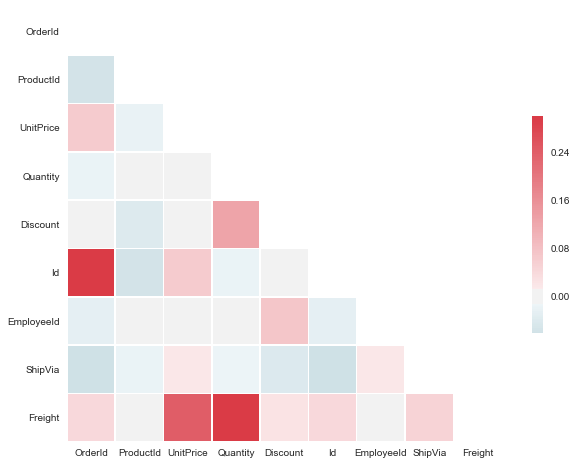

In [22]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="white")

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 8))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws= {"shrink": .5})

From the heatmap above we can see that there is very little correlation amongst the data as it stands now, with a few exceptions. There is a relatively strong correlation between Order Id and Id. This is to be expected as OrderId in the OrderDetails table is the key for Id in the Order table. The second strongest correlation is between Quantity and Freight; this is also intuitive as the weight of an order will increase as the quantity increases. The third strongest correlation is between UnitPrice and Freight. The correlation that we are interested in, that between Discount and Quantity, shows a mild positive correlation, which we will analyze in further detail below.

In [23]:
df1 = pd.read_sql_query('''SELECT * FROM OrderDetail WHERE OrderDetail.Discount = 0.0''', engine)
print(df1)

2019-07-03 10:16:59,975 INFO sqlalchemy.engine.base.Engine SELECT * FROM OrderDetail WHERE OrderDetail.Discount = 0.0
2019-07-03 10:16:59,978 INFO sqlalchemy.engine.base.Engine ()
            Id  OrderId  ProductId  UnitPrice  Quantity  Discount
0     10248/11    10248         11      14.00        12       0.0
1     10248/42    10248         42       9.80        10       0.0
2     10248/72    10248         72      34.80         5       0.0
3     10249/14    10249         14      18.60         9       0.0
4     10249/51    10249         51      42.40        40       0.0
5     10250/41    10250         41       7.70        10       0.0
6     10251/65    10251         65      16.80        20       0.0
7     10252/60    10252         60      27.20        40       0.0
8     10253/31    10253         31      10.00        20       0.0
9     10253/39    10253         39      14.40        42       0.0
10    10253/49    10253         49      16.00        40       0.0
11    10254/74    10254     

In [24]:
df1['Quantity'].mean()

21.715261958997722

In [25]:
df2 = pd.read_sql_query('''SELECT * FROM OrderDetail WHERE OrderDetail.Discount > 0.0''', engine)
print(df2)

2019-07-03 10:17:01,927 INFO sqlalchemy.engine.base.Engine SELECT * FROM OrderDetail WHERE OrderDetail.Discount > 0.0
2019-07-03 10:17:01,929 INFO sqlalchemy.engine.base.Engine ()
           Id  OrderId  ProductId  UnitPrice  Quantity  Discount
0    10250/51    10250         51      42.40        35      0.15
1    10250/65    10250         65      16.80        15      0.15
2    10251/22    10251         22      16.80         6      0.05
3    10251/57    10251         57      15.60        15      0.05
4    10252/20    10252         20      64.80        40      0.05
5    10252/33    10252         33       2.00        25      0.05
6    10254/24    10254         24       3.60        15      0.15
7    10254/55    10254         55      19.20        21      0.15
8     10258/2    10258          2      15.20        50      0.20
9     10258/5    10258          5      17.00        65      0.20
10   10258/32    10258         32      25.60         6      0.20
11   10260/41    10260         41       

In [26]:
df2['Quantity'].mean()

27.10978520286396

Whereas the average quantity ordered without a discount is only 21 units, the quantity ordered when a discount is given is 27 units. Let's view the orders graphically to reinforce these numbers.

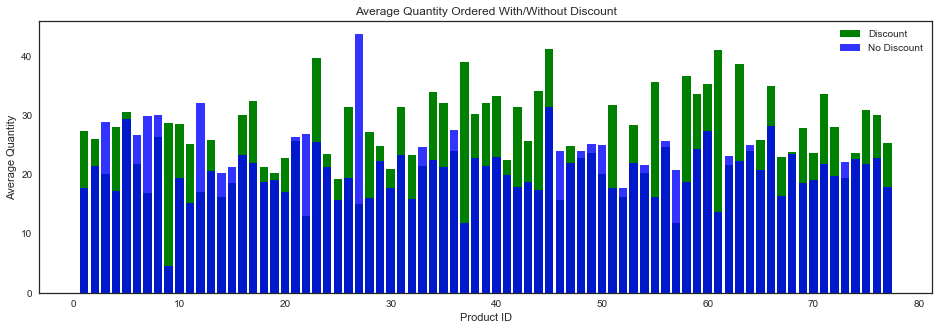

In [27]:
no_disc = df1.groupby('ProductId')['Quantity'].mean()
disc = df2.groupby('ProductId')['Quantity'].mean()
plt.figure(figsize=(16,5))
plt.bar(disc.index, disc.values, alpha=1, label='Discount', color='g')
plt.bar(no_disc.index, no_disc.values, alpha=0.8, label='No Discount', color='b')
plt.legend()
plt.title('Average Quantity Ordered With/Without Discount')
plt.xlabel('Product ID')
plt.ylabel('Average Quantity')
plt.show()

It is clear from the above graph that adding a discount increases the quantity of products sold for almost every category. But is it statistically significant?

#### Testing for Statistical Significance
To test for statistical significance, we will use a one-tailed t-test.

In [28]:
#grouping discounts by percentage
groups = {}
discounts = df2['Discount']
for i in discounts:
    groups[i] = df2[df2['Discount']==i]
    
discounts_df = pd.DataFrame(columns=['Discount %','Orders','Avg. Order Quantity'])
for i in groups.keys():
    discounts_df = discounts_df.append({'Discount %':i*100,'Orders':len(groups[i]),'Avg. Order Quantity':groups[i]['Quantity'].mean()}, ignore_index=True)

discounts_df

,Discount %,Orders,Avg. Order Quantity
0,15.0,157.0,28.382166
1,5.0,185.0,28.010811
2,20.0,161.0,27.024845
3,25.0,154.0,28.240260
4,10.0,173.0,25.236994
5,2.0,2.0,2.000000
6,3.0,3.0,1.666667
7,4.0,1.0,1.000000
8,6.0,1.0,2.000000
9,1.0,1.0,2.000000


As the discounts of 1%, 2%, 3%, 4%, and 6% appear to have a minor effect, we will build another dataframe without these discounts and compare our results. It is likely that the inclusion of such uninfluential discounts will skew our results. 

We will use the bootstrap sampling method to test our assumption and Cohen's d to calculate the standardized difference between the two means (mean difference over standard deviation). 

In [29]:
#Bootstrap sampling method 

def bootstrap(sample, n):
    bootstrap_sampling_dist = []
    for i in range(n):
        bootstrap_sampling_dist.append(np.random.choice(sample, size=len(sample), replace=True).mean())
    return np.array(bootstrap_sampling_dist)

In [30]:
def Cohen_d(group1, group2):

    diff = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)

    d = diff / np.sqrt(pooled_var)
    return abs(d)

In [31]:
discounts_significance_df = pd.DataFrame(columns=['Discount %','Null Hypothesis','Cohens d'], index=None)

discounts = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1, 0.15, 0.2, 0.25]
control = df1[df1['Discount']==0.0]['Quantity']
for i in discounts:
    experimental = df2[df2['Discount']==i]['Quantity']
    st, p = stats.ttest_ind(control, experimental)
    d = Cohen_d(experimental, control)
    discounts_significance_df = discounts_significance_df.append( { 'Discount %' : str(i*100)+'%' , 'Null Hypothesis' : 'Reject' if p < 0.025 else 'Failed', 'Cohens d' : d } , ignore_index=True)    

discounts_significance_df

/Users/shannonamcchesney/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/shannonamcchesney/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Discount %,Null Hypothesis,Cohens d
0,1.0%,Failed,NaN
1,2.0%,Failed,1.126953
2,3.0%,Failed,1.146446
3,4.0%,Failed,NaN
4,5.0%,Reject,0.346877
5,6.0%,Failed,NaN
6,10.0%,Reject,0.195942
7,15.0%,Reject,0.372404
8,20.0%,Reject,0.300712
9,25.0%,Reject,0.366593


In [32]:
discounts_fives_significance_df = pd.DataFrame(columns=['Discount %','Null Hypothesis','Cohens d'], index=None)

discounts = [0.05, 0.1, 0.15, 0.2, 0.25]
control = df1[df1['Discount']==0.0]['Quantity']
for i in discounts:
    experimental = df2[df2['Discount']==i]['Quantity']
    st, p = stats.ttest_ind(control, experimental)
    d = Cohen_d(experimental, control)
    discounts_fives_significance_df = discounts_fives_significance_df.append( { 'Discount %' : str(i*100)+'%' , 'Null Hypothesis' : 'Reject' if p < 0.025 else 'Failed', 'Cohens d' : d } , ignore_index=True)    

discounts_fives_significance_df

,Discount %,Null Hypothesis,Cohens d
0,5.0%,Reject,0.346877
1,10.0%,Reject,0.195942
2,15.0%,Reject,0.372404
3,20.0%,Reject,0.300712
4,25.0%,Reject,0.366593


We can see from the above two tables that discounts of 1%, 2%, 3%, 4%, and 6% are not statistically significant enough to indicate an effect on the number of products sold. Discounts with multiples of five (5%, 10%, 15%, 20%, and 25%) show enough *statistical significance* for us to reject the null hypothesis and confirm that they have increase the number of products sold.

Now let us find which level of discount is optimal for increasing that quantity.

### B. Which level of discount is optimal for increasing quantity of products sold, if any?
To find the answer we will once again use Cohen's d to determine whether there is any difference between each of the means of the discounts.

In [33]:
discounts = np.array([0.05, 0.1, 0.15, 0.2, 0.25])
comb = itertools.combinations(discounts, 2)
discount_levels_df = pd.DataFrame(columns=['Discount %','Null Hypothesis','Cohens d'], index=None)

for i in comb:
    
    control = df2[df2['Discount']==i[0]]['Quantity']
    experimental = df2[df2['Discount']==i[1]]['Quantity']
    
    st, p = stats.ttest_ind(experimental, control)
    d = Cohen_d(experimental, control)
    
    discount_levels_df = discount_levels_df.append( { 'Discount %' : str(i[0]*100)+'% - '+str(i[1]*100)+'%', 'Null Hypothesis' : 'Reject' if p < 0.05 else 'Failed', 'Cohens d' : d } , ignore_index=True)    

discount_levels_df.sort_values('Cohens d', ascending=False)

,Discount %,Null Hypothesis,Cohens d
4,10.0% - 15.0%,Failed,0.149332
6,10.0% - 25.0%,Failed,0.145146
0,5.0% - 10.0%,Failed,0.127769
5,10.0% - 20.0%,Failed,0.089008
7,15.0% - 20.0%,Failed,0.068234
9,20.0% - 25.0%,Failed,0.062415
2,5.0% - 20.0%,Failed,0.047644
1,5.0% - 15.0%,Failed,0.017179
3,5.0% - 25.0%,Failed,0.010786
8,15.0% - 25.0%,Failed,0.006912


The most significance occurs between 10-15%, while the least significance occurs between 15-25%. However, the difference amongst the number products ordered and the discount percentage given is *not statistically significant*. Perhaps this would change with a larger number of orders, but with the data currentlyl given, we must maintain that no single discount percentage is optimum.

### 2. Effect of Discounts on Total Sale Price
#### A. Does the same correlation apply between discounts and total order sale price?

The null and alternate hypothesis are as follows:
H0: There is no correlation between discounts and total order sale price.
HA: There is a correlation between discounts and total order sale price.

In [48]:
df1 = pd.read_sql_query('''SELECT UnitPrice, Quantity, Discount FROM OrderDetail WHERE Discount = 0.0''', engine)
print(df1)

2019-07-03 11:48:00,119 INFO sqlalchemy.engine.base.Engine SELECT UnitPrice, Quantity, Discount FROM OrderDetail WHERE Discount = 0.0
2019-07-03 11:48:00,125 INFO sqlalchemy.engine.base.Engine ()
      UnitPrice  Quantity  Discount
0         14.00        12       0.0
1          9.80        10       0.0
2         34.80         5       0.0
3         18.60         9       0.0
4         42.40        40       0.0
5          7.70        10       0.0
6         16.80        20       0.0
7         27.20        40       0.0
8         10.00        20       0.0
9         14.40        42       0.0
10        16.00        40       0.0
11         8.00        21       0.0
12        15.20        20       0.0
13        13.90        35       0.0
14        15.20        25       0.0
15        44.00        30       0.0
16        26.20        15       0.0
17        10.40        12       0.0
18        35.10        25       0.0
19        14.40         6       0.0
20        10.40        15       0.0
21         8

In [49]:
for i in df1:
    OrderTotalNoDisc = df1.UnitPrice*df1.Quantity

print(OrderTotalNoDisc.mean())

570.0065375854215


In [50]:
df2 = pd.read_sql_query('''SELECT UnitPrice, Quantity, Discount FROM OrderDetail WHERE Discount > 0.0''', engine)
print(df2)

for i in df2:
    OrderTotalDisc = df2.UnitPrice*df2.Quantity

print(OrderTotalDisc.mean())

2019-07-03 11:48:10,088 INFO sqlalchemy.engine.base.Engine SELECT UnitPrice, Quantity, Discount FROM OrderDetail WHERE Discount > 0.0
2019-07-03 11:48:10,089 INFO sqlalchemy.engine.base.Engine ()
     UnitPrice  Quantity  Discount
0        42.40        35      0.15
1        16.80        15      0.15
2        16.80         6      0.05
3        15.60        15      0.05
4        64.80        40      0.05
5         2.00        25      0.05
6         3.60        15      0.15
7        19.20        21      0.15
8        15.20        50      0.20
9        17.00        65      0.20
10       25.60         6      0.20
11        7.70        16      0.25
12       39.40        15      0.25
13       12.00        21      0.25
14       17.00        12      0.20
15       13.90        60      0.25
16       20.70        60      0.25
17        8.00        36      0.25
18        7.70        25      0.15
19       30.40        12      0.05
20       44.00        70      0.15
21       14.40        15      0.15

In [51]:
df1['TotalSalePrice'] = OrderTotalNoDisc
print(df1)

      UnitPrice  Quantity  Discount  TotalSalePrice
0         14.00        12       0.0          168.00
1          9.80        10       0.0           98.00
2         34.80         5       0.0          174.00
3         18.60         9       0.0          167.40
4         42.40        40       0.0         1696.00
5          7.70        10       0.0           77.00
6         16.80        20       0.0          336.00
7         27.20        40       0.0         1088.00
8         10.00        20       0.0          200.00
9         14.40        42       0.0          604.80
10        16.00        40       0.0          640.00
11         8.00        21       0.0          168.00
12        15.20        20       0.0          304.00
13        13.90        35       0.0          486.50
14        15.20        25       0.0          380.00
15        44.00        30       0.0         1320.00
16        26.20        15       0.0          393.00
17        10.40        12       0.0          124.80
18        35

In [52]:
df2['TotalSalePrice'] = OrderTotalDisc
print(df2)

     UnitPrice  Quantity  Discount  TotalSalePrice
0        42.40        35      0.15         1484.00
1        16.80        15      0.15          252.00
2        16.80         6      0.05          100.80
3        15.60        15      0.05          234.00
4        64.80        40      0.05         2592.00
5         2.00        25      0.05           50.00
6         3.60        15      0.15           54.00
7        19.20        21      0.15          403.20
8        15.20        50      0.20          760.00
9        17.00        65      0.20         1105.00
10       25.60         6      0.20          153.60
11        7.70        16      0.25          123.20
12       39.40        15      0.25          591.00
13       12.00        21      0.25          252.00
14       17.00        12      0.20          204.00
15       13.90        60      0.25          834.00
16       20.70        60      0.25         1242.00
17        8.00        36      0.25          288.00
18        7.70        25      0

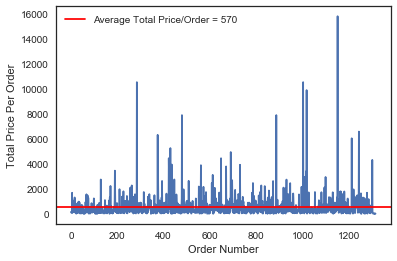

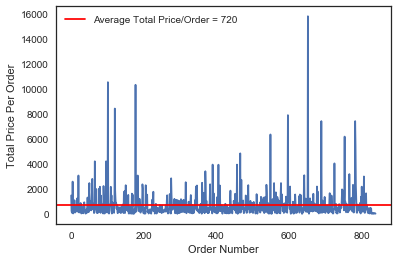

In [53]:
plt.plot(OrderTotalNoDisc)
plt.ylabel('Total Price Per Order')
plt.xlabel('Order Number')
plt.axhline(y=OrderTotalNoDisc.mean(), color='r', linestyle='-', label='Average Total Price/Order = 570')
plt.legend()
plt.show()

plt.plot(OrderTotalDisc)
plt.ylabel('Total Price Per Order')
plt.xlabel('Order Number')
plt.axhline(y=OrderTotalDisc.mean(), color='r', linestyle='-', label='Average Total Price/Order = 720')
plt.legend()
plt.show()

So we can see just by checking the mean of sales with a discount (average total sale price of 720) against the mean of sales without a discount (average total sale price of 570) that offering a discount increases the total order price. However, it does not tell us what percentage of a discount is most effective.



In [ ]:
discounts_levels_price_df = pd.DataFrame(columns=['Discount %','Null Hypothesis','Cohens d'], index=None)

discounts = [0.05, 0.1, 0.15, 0.2, 0.25]
control = df1[df1['Discount']==0.0]['Quantity']
for i in discounts:
    experimental = df2[df2['Discount']==i]['Quantity']
    st, p = stats.ttest_ind(control, experimental)
    d = Cohen_d(experimental, control)
    discounts_levels_price_df = discounts_levels_price_df.append( { 'Discount %' : str(i*100)+'%' , 'Null Hypothesis' : 'Reject' if p < 0.025 else 'Failed', 'Cohens d' : d } , ignore_index=True)    

discounts_levels_price_df

#### B. What size (percentage) discount is optimal for increases total sale price?

We can see from the above data that offering a discount increases the total dollar amount of each sale. Now let us see if there is a *statistically significant* difference amongst the discounts given.

In [55]:
discounts = np.array([0.05, 0.1, 0.15, 0.2, 0.25])
comb = itertools.combinations(discounts, 2)
discount_levels_price_diff_df = pd.DataFrame(columns=['Discount %','Null Hypothesis','Cohens d'], index=None)

for i in comb:
    
    control = df2[df2['Discount']==i[0]]['TotalSalePrice']
    experimental = df2[df2['Discount']==i[1]]['TotalSalePrice']
    
    st, p = stats.ttest_ind(experimental, control)
    d = Cohen_d(experimental, control)
    
    discount_levels_price_diff_df = discount_levels_price_diff_df.append( { 'Discount %' : str(i[0]*100)+'% - '+str(i[1]*100)+'%', 'Null Hypothesis' : 'Reject' if p < 0.05 else 'Failed', 'Cohens d' : d } , ignore_index=True)    

discount_levels_price_diff_df.sort_values('Cohens d', ascending=False)

,Discount %,Null Hypothesis,Cohens d
6,10.0% - 25.0%,Reject,0.263089
0,5.0% - 10.0%,Reject,0.214361
8,15.0% - 25.0%,Failed,0.191350
1,5.0% - 15.0%,Failed,0.152828
9,20.0% - 25.0%,Failed,0.128970
5,10.0% - 20.0%,Failed,0.108206
2,5.0% - 20.0%,Failed,0.106436
4,10.0% - 15.0%,Failed,0.102662
7,15.0% - 20.0%,Failed,0.036912
3,5.0% - 25.0%,Failed,0.011664


From the above table we can see that the p-value for the t-tests for the difference between discounts levels was too high to be statistically significant for almost all of the discount relationships.

The exceptions are 10% ~ 25% and 5% ~ 10%. For each of these two relationships there is a *statistically significant* difference between discount levels. 

It is important to note that this difference was not statistically significant when used to determine the number of products sold, but it *is* of statistical significance when considering the total purchase price.

## 3. Do holidays have an effect on the number of products sold?

For this question we will take into account which countries we are dealing with and which holidays those countries celebrate.

In [56]:
empl_country = pd.read_sql_query('''SELECT Country FROM Employee''', engine)
print(empl_country)

2019-07-03 11:48:34,520 INFO sqlalchemy.engine.base.Engine SELECT Country FROM Employee
2019-07-03 11:48:34,521 INFO sqlalchemy.engine.base.Engine ()
  Country
0     USA
1     USA
2     USA
3     USA
4      UK
5      UK
6      UK
7     USA
8      UK


In [57]:
cust_country = pd.read_sql_query('''SELECT Country FROM Customer''', engine)
c_country = pd.DataFrame(cust_country, columns=['Country'])
print(c_country)

2019-07-03 11:48:35,783 INFO sqlalchemy.engine.base.Engine SELECT Country FROM Customer
2019-07-03 11:48:35,784 INFO sqlalchemy.engine.base.Engine ()
        Country
0       Germany
1        Mexico
2        Mexico
3            UK
4        Sweden
5       Germany
6        France
7         Spain
8        France
9        Canada
10           UK
11    Argentina
12       Mexico
13  Switzerland
14       Brazil
15           UK
16      Germany
17       France
18           UK
19      Austria
20       Brazil
21        Spain
22       France
23       Sweden
24      Germany
25       France
26        Italy
27     Portugal
28        Spain
29        Spain
..          ...
61       Brazil
62      Germany
63    Argentina
64          USA
65        Italy
66       Brazil
67  Switzerland
68        Spain
69       Norway
70          USA
71           UK
72      Denmark
73       France
74          USA
75      Belgium
76          USA
77          USA
78      Germany
79       Mexico
80       Brazil
81          USA
82

USA            13
Germany        11
France         11
Brazil          9
UK              7
Spain           5
Mexico          5
Venezuela       4
Canada          3
Italy           3
Argentina       3
Austria         2
Denmark         2
Portugal        2
Sweden          2
Belgium         2
Switzerland     2
Finland         2
Ireland         1
Poland          1
Norway          1
Name: Country, dtype: int64


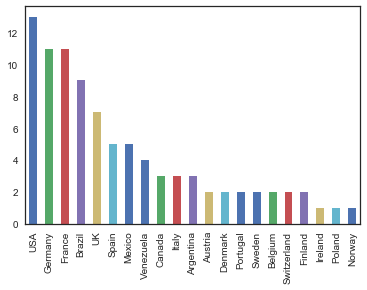

In [58]:
print(c_country['Country'].value_counts())
c_country['Country'].value_counts().plot('bar')

The most voluminous gift-giving holidays across these countries occurs in December. Let's separate the orders out month by month to see if there is an increase in orders in December.

In [59]:
OrdersByDate = pd.read_sql_query('''SELECT Id, OrderDate, ShipCountry FROM [Order] ORDER BY OrderDate''', engine)
print(OrdersByDate)

2019-07-03 11:49:00,397 INFO sqlalchemy.engine.base.Engine SELECT Id, OrderDate, ShipCountry FROM [Order] ORDER BY OrderDate
2019-07-03 11:49:00,399 INFO sqlalchemy.engine.base.Engine ()
        Id   OrderDate  ShipCountry
0    10248  2012-07-04       France
1    10249  2012-07-05      Germany
2    10250  2012-07-08       Brazil
3    10251  2012-07-08       France
4    10252  2012-07-09      Belgium
5    10253  2012-07-10       Brazil
6    10254  2012-07-11  Switzerland
7    10255  2012-07-12  Switzerland
8    10256  2012-07-15       Brazil
9    10257  2012-07-16    Venezuela
10   10258  2012-07-17      Austria
11   10259  2012-07-18       Mexico
12   10260  2012-07-19      Germany
13   10261  2012-07-19       Brazil
14   10262  2012-07-22          USA
15   10263  2012-07-23      Austria
16   10264  2012-07-24       Sweden
17   10265  2012-07-25       France
18   10266  2012-07-26      Finland
19   10267  2012-07-29      Germany
20   10268  2012-07-30    Venezuela
21   10269  2012-07-3

In [60]:
OrdersByDate.OrderDate = pd.to_datetime(OrdersByDate.OrderDate, format='%Y-%m-%d')

In [74]:
month_groups = OrdersByDate.groupby(pd.Grouper(key='OrderDate', freq = 'M'))
list(month_groups)

[(Timestamp('2012-07-31 00:00:00', freq='M'),        Id  OrderDate  ShipCountry
  0   10248 2012-07-04       France
  1   10249 2012-07-05      Germany
  2   10250 2012-07-08       Brazil
  3   10251 2012-07-08       France
  4   10252 2012-07-09      Belgium
  5   10253 2012-07-10       Brazil
  6   10254 2012-07-11  Switzerland
  7   10255 2012-07-12  Switzerland
  8   10256 2012-07-15       Brazil
  9   10257 2012-07-16    Venezuela
  10  10258 2012-07-17      Austria
  11  10259 2012-07-18       Mexico
  12  10260 2012-07-19      Germany
  13  10261 2012-07-19       Brazil
  14  10262 2012-07-22          USA
  15  10263 2012-07-23      Austria
  16  10264 2012-07-24       Sweden
  17  10265 2012-07-25       France
  18  10266 2012-07-26      Finland
  19  10267 2012-07-29      Germany
  20  10268 2012-07-30    Venezuela
  21  10269 2012-07-31          USA),
 (Timestamp('2012-08-31 00:00:00', freq='M'),        Id  OrderDate ShipCountry
  22  10270 2012-08-01     Finland
  23  10271 

In [77]:
print(month_groups.count())

            Id  ShipCountry
OrderDate                  
2012-07-31  22           22
2012-08-31  25           25
2012-09-30  23           23
2012-10-31  26           26
2012-11-30  25           25
2012-12-31  31           31
2013-01-31  33           33
2013-02-28  29           29
2013-03-31  30           30
2013-04-30  31           31
2013-05-31  32           32
2013-06-30  30           30
2013-07-31  33           33
2013-08-31  33           33
2013-09-30  37           37
2013-10-31  38           38
2013-11-30  34           34
2013-12-31  48           48
2014-01-31  55           55
2014-02-28  54           54
2014-03-31  73           73
2014-04-30  74           74
2014-05-31  14           14


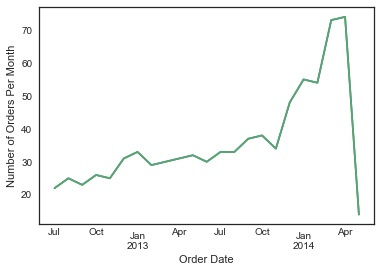

<Figure size 1440x576 with 0 Axes>

In [100]:
month_groups.count().plot()
plt.ylabel('Number of Orders Per Month')
plt.xlabel('Order Date')
plt.legend('')
plt.show()

From the above graph we can see that sales do not peak around December in either 2012 or 2013. The holiday season does not seem to have an effect on the number of orders made. Even when we see an increase around December, it does not taper off, but continues to grow steadily.

In [ ]:
OrdersByDate['Month'] = OrdersByDate.OrderDate.dt.month
OrdersByDate['NumberofOrders'] = OrdersByDate.groupby('Month').agg('count')
OrdersByDate.groupby('Month')

In [ ]:
formula = 'NumberofOrders ~ C(Month)'
lm = ols(formula, OrdersByDate).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

## 4. Are men or women more productive?
To answer this question, we must first decide how to measure productivity. In this case, we will use the number of orders filled in a t-test to determine productivity, focusing on Sales Representatives.

In [79]:
titles_df = pd.read_sql_query('''SELECT EmployeeId, Title, TitleOfCourtesy, COUNT([Order].Id) FROM Employee JOIN [Order] ON Employee.Id=[Order].EmployeeId GROUP BY Employee.Id''', engine)
print(titles_df)

salesrep_df = titles_df[titles_df['Title']=='Sales Representative']
print(salesrep_df)

2019-07-01 15:49:26,030 INFO sqlalchemy.engine.base.Engine SELECT EmployeeId, Title, TitleOfCourtesy, COUNT([Order].Id) FROM Employee JOIN [Order] ON Employee.Id=[Order].EmployeeId GROUP BY Employee.Id
2019-07-01 15:49:26,032 INFO sqlalchemy.engine.base.Engine ()
   EmployeeId                     Title TitleOfCourtesy  COUNT(
0           1      Sales Representative             Ms.     123
1           2     Vice President, Sales             Dr.      96
2           3      Sales Representative             Ms.     127
3           4      Sales Representative            Mrs.     156
4           5             Sales Manager             Mr.      42
5           6      Sales Representative             Mr.      67
6           7      Sales Representative             Mr.      72
7           8  Inside Sales Coordinator             Ms.     104
8           9      Sales Representative             Ms.      43
   EmployeeId                 Title TitleOfCourtesy  COUNT(
0           1  Sales Representative 

We can see from the above data that there are four female sales representatives and two male sales representatives. Let's see if that is because women are more productive than men. Our null hypothesis is that there is no difference in productivity between men and women. Our alternative hypothesis will be that there is a statistically significant difference in productivity between men and women.

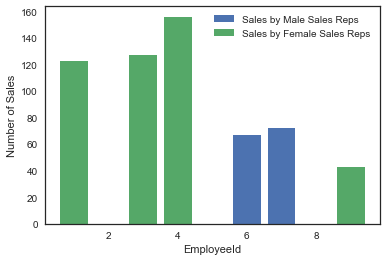

In [89]:
male_salesreps_df = salesrep_df[salesrep_df['TitleOfCourtesy']=='Mr.']
female_salesreps_df = salesrep_df[salesrep_df['TitleOfCourtesy']!='Mr.']

plt.bar(male_salesreps_df['EmployeeId'], male_salesreps_df['COUNT('], label='Sales by Male Sales Reps')
plt.bar(female_salesreps_df['EmployeeId'], female_salesreps_df['COUNT('], label='Sales by Female Sales Reps')
plt.ylabel('Number of Sales')
plt.xlabel('EmployeeId')
plt.legend()
plt.show()

From the chart above, we can see that three out of the four female sales representatives completed more sales than either of the two male sales representatives. Now it is time to prove a *statistically significant* difference.

In [90]:
stats.ttest_ind(male_salesreps_df['COUNT('], female_salesreps_df['COUNT('])

Ttest_indResult(statistic=-1.1753826597010195, pvalue=0.3050279021629868)

In [91]:
Cohen_d(male_salesreps_df['COUNT('], female_salesreps_df['COUNT('])

1.0791800151330935

Although we can see from the bar chart that 75% of the female sales representatives complete more sales than their male counterparts, the above p-values indicate that there is *no statistically significant* difference in productivity between male sales representatives and female sales representatives. This is likely due to such a small sample size. A company with more employees may show more statistical significance. The statistical significance also could be effected by the fact that there are twice as many female sales representatives as male sales representatives; a more equal distribution between male and female may help to ameliorate any skewedness.

## Future Research
There are many further research projects that a data scientist may undertake with the Northwind Database. Some of these include:
- Annual Atrophy of Customers
- Potential Growth Categories Per Country
- Time-Series Analysis of Sales Per Country